## MNIST

MNIST is a set of 70,000 handwritten digits. 

In [1]:
import numpy as np

In [2]:
## have to use a special script to download... fetch_mldata is deprecated

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [3]:
## mnist is a NumPy array
X, y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


70,000 images and 784 features (28x28 pixels). Each feature represents a pixel's intensity from 0 (white) to 255 (black). To look at a digit example, reshape an observation to a 28x28 array. 

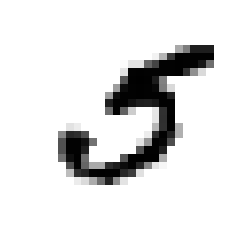

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] 
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000]

5

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
import numpy as np

## shuffle 
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Train a binary classifier

We want to build a classifier to detect the number 5.

In [8]:
## make target vectors
y_train_5 = (y_train==5)
y_test_5 = (y_train==5)

In [9]:
## train SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

The SGD Classifier correctly predicted `some_digit`!

## Performance measures

Evaluating a classifier is tricker than evaluating a regressor.

### Measuring accuracy with cross-validation

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

array([0.8275 , 0.95945, 0.9468 ])

The accuracy is deceptively high because the classes are imbalanced. You'd achieve 90% accuracy just by guessing not 0 by default.

In [12]:
from sklearn.base import BaseEstimator

## always outputs 0, because 0 means not 5 in y_train_5
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9079 , 0.911  , 0.91005])

Accuracy is not the best performance measure for classifiers, especially when skew is involved.

## Confusion matrix

A better way to evaluate classifier performance. You need a set of predictions to compute the confusion matrix.

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

`cross_val_predict()` performs K-fold CV, returning the predictions from each fold instead of the validatoin scores.

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[50308,  4271],
       [ 1054,  4367]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. To summarize the confusion matrix, there is precision and recall.

* precision = TP/ (TP+FP) ... how correct were you when guessed positive?
* recall = TP / (TP+FN ) ... how many of the positives were you able to guess?

## Precision and recall

In [16]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.505556841861542
0.8055709278730862


* Precision: how correct are you? 
* Recall is how well did you detect?

You can combine these into a single metric: the F1 score. F1 score is the harmonic mean of precision and recall. 

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6212390639448041

F1 score favors classifiers with similar precision and recall. So if you care equally about the two, use it. 

If you want to train a classifier to detect videos that are safe for kids, you prefer a classifier that only keeps safe videos at the risk of rejecting many good videos. This classifier would have high precision (few false positives aka videos that are NSFW but pass the test) but low recall (more false negatives, aka rejects videos more videos than necessary.

If you want to train a classifier to detect shoplifters, you want to make sure you have high recall. It's okay to have low precision (some of your guesses will be wrong), as long as you catch most of the shoplifters.

Precision reduces recall. This is the precision/recall tradeoff.

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([43332.16398806])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
## raising the threshold decreases recall
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

How to choose which decision threshold? You need to get scores of all instances in training set with cross_val_predict, but this time return decision scores.

Choosing a threshold will depend on the subject domain and these plots.

In [21]:
## cross_val_score vs cross_val_predict
## method specifies a decision score instead
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3,
                            method="decision_function")

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

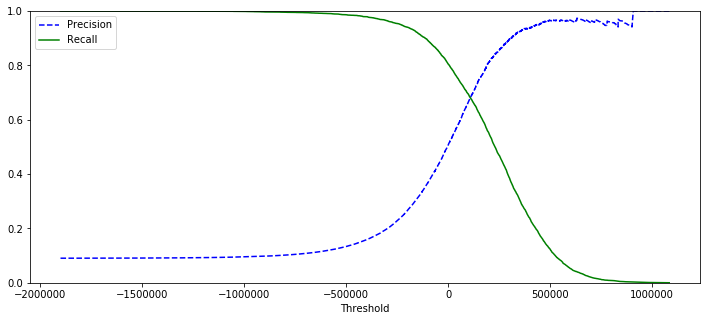

In [23]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(threshold, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plt.figure(figsize=(12,5))
plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.show()

You could choose the threshold that gives you best precision/recall tradeoff. You can also plot precision directly against recall.

In [24]:
y_train_pred_90 = (y_scores > 70000)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))

0.6178683385579937
0.7271721084670725


## ROC Curve

The receiver operating characteristic curve is similar to 
precision/recall, but plots true positive rate (recall) vs false positive rate. FPR is ratio of negative instances incorrectly classified as positive. 

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

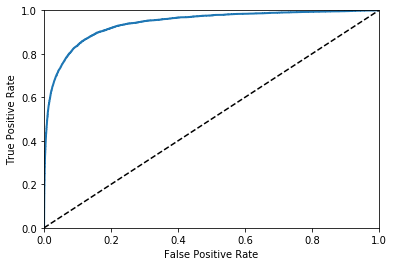

In [26]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

The higher the recall TPR, the more false positives the classifier produces. A good classifier stays up and to the right. One way to compare classifiers is with area under the curve: a perfect classifier will be = 1; a random classifier will be = .5.

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9405573393797974

You should prefer the PR curve when positive class is rare or when you care more about false positives than false negatives, and the ROC curve otherwise.

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3,
                                   method="predict_proba")

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


`RandomForestClsasifier` does not have a `decision_function()` method but has a `predict_proba()` method. To get a score, you can just use the positive class's probability as the score.

In [29]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

/Users/collindching/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


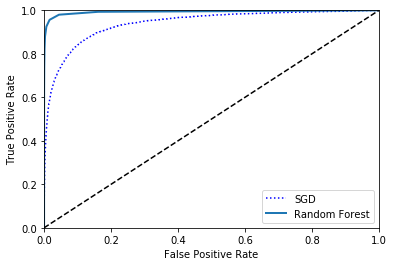

In [30]:
plt.plot(fpr,tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

The `RandomForestClassifier`'s ROC curve is better than the `SGDClassifier`. It will have a higher AUC.

In [31]:
roc_auc_score(y_train_5, y_scores_forest)

0.9932217162986607

## Multiclass classification

Extends binary classifiers to 3+ classes. Random forests and naive Bayes classifiers can handle multiple classes, whereas SVMs and linear classifiers are strictly binary. 

There's strategies you can use to perform multiclass classification with binary classifiers. One system is the one-versus-all technique: train a classifier for each digit and pick the highest decision score. 

Another strategy is one-versus-one but I don't really understand it and don't think it's usually used.

In [32]:
## fits SGDClassifier on training set, then makes a prediction
## 10 binary classifiers are trained, then highest decision score taken
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=int8)

#### Train a `SGDClassifier`

In [33]:
## scores for every digit
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -65372.96364369, -546689.39991968, -368568.86136133,
        -127911.82818576, -401731.81029171,   43332.16398806,
        -571756.23779904, -298969.42827396, -640329.7524365 ,
        -727137.99423235]])

In [34]:
np.argmax(some_digit_scores)

5

In [35]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

#### Train a `RandomForestClassifier`

In [36]:
forest_clf.fit(X_train,y_train)
## prediction
forest_clf.predict([some_digit])

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=int8)

In [37]:
## decision scores
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0.1, 0. ]])

In [38]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

array([0.83553289, 0.8539427 , 0.83792569])

In [39]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94021196, 0.93964698, 0.93989098])

### Scaling inputs

You can improve accuracy for the `SGDClassifier` just by scaling the inputs

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

array([0.91166767, 0.90704535, 0.90983648])

I don't think it has an effect on the random forest classifier though. 

In [41]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.94016197, 0.93949697, 0.93984098])

## Error analysis 

Assuming you have found a promising model and want to tune it, you can analyze the types of errors it makes. 

In [43]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

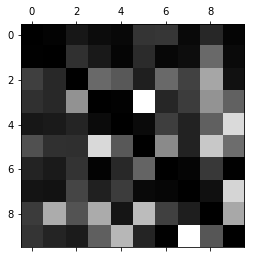

In [44]:
## fill diagonal with zeros to keep only errors... then plot results
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Rows represent actual classes; columns represent predicted classes. Columns for classes 8 and 9 are bright, which tells you that many images get misclassified as 8s and 9s. If you look at rows, 5 gets confused for a lot of other things, aso does 8. 

From this, we can glean that we should improve classification of 8s and 9s, as well as fix the confusion between 3 and 5. We can do this by gathering more training data for f=these digits. Or engineer new features to help the classifier. Or preprocess the images to make closed loops stand out more.

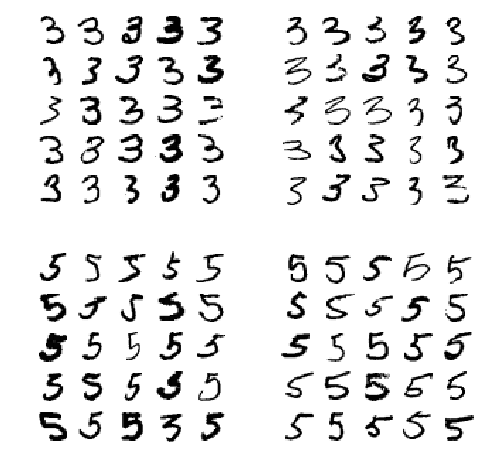

In [47]:
cl_a, cl_b = 3, 5

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

## actual a, predicted a
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
## actual a, predicted b
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
## actual b, predicted a
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
## actual b, predicted b
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

To help with these errors, you could write a function to pre-process these images by centering and rotating them.

## Multilabel classification

Sometimes you'll output multiple classes (ie is it 5 + whether the number is odd or even).

In [49]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

This creates a y_multilabel array with two target labels for each digit image: whether the digit is large (7, 8, 9) and wehther or not it's odd.

In [57]:
knn_clf.predict([some_digit])

array([[False,  True]])

## Multioutput classification

Multioutput classification is a generalization of multilabel classification where each label can be multiclass.

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 783))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)